# 5002 Project

## Task 1: Average Travel Time Estimation

In [1]:
import feature
import model
import matplotlib.pyplot as plt
import utils

In [2]:
dataset_train, dataset_test = feature.load()

In [3]:
lgbm = model.LGBM(lr=1e-2, boosting_type='gbdt', obj='regression', metric='rmse', bagging_freq=1, bagging_fraction=0.8, feature_fraction=0.4)

In [4]:
lgbm.train(dataset_train, val_proportion=0.2, max_round=300)

number of training data = 17875
number of validation data = 4466
round: 20/300
round: 40/300
round: 60/300
round: 80/300
round: 100/300
round: 120/300
round: 140/300
round: 160/300
round: 180/300
round: 200/300
round: 220/300
round: 240/300
round: 260/300
round: 280/300
round: 300/300


lowest MAPE = 0.2542598807110399
best_boost_round = 300


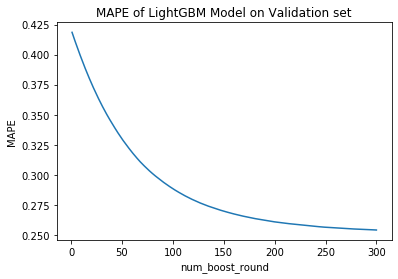

In [5]:
print("lowest MAPE = %s" % lgbm.lowest_MAPE_)
print("best_boost_round = %s" % lgbm.best_boost_round_)

plt.title("MAPE of LightGBM Model on Validation set")
plt.xlabel("num_boost_round")
plt.ylabel("MAPE")
plt.plot(range(1,301), lgbm.MAPE_history_)
plt.show()

In [6]:
rf = model.RandomForestRegression()
rf.train(dataset_train, val_proportion=0.2, max_n_estimators=20)

number of training data = 17872
number of validation data = 4469
n_estimators: 2/20
n_estimators: 4/20
n_estimators: 6/20
n_estimators: 8/20
n_estimators: 10/20
n_estimators: 12/20
n_estimators: 14/20
n_estimators: 16/20
n_estimators: 18/20
n_estimators: 20/20


lowest MAPE = 0.2573946796283038
best_boost_round = 20


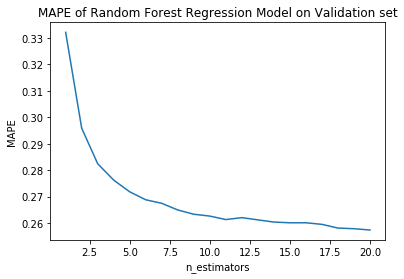

In [7]:
print("lowest MAPE = %s" % rf.lowest_MAPE_)
print("best_boost_round = %s" % rf.best_n_estimators_)

plt.title("MAPE of Random Forest Regression Model on Validation set")
plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.plot(range(1,21), rf.MAPE_history_)
plt.show()

In [1]:
import torch
torch.cuda.is_available()

True

In [9]:
device = torch.device('cuda')

number of training data = 17870
number of validation data = 4471
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.24051793416341147


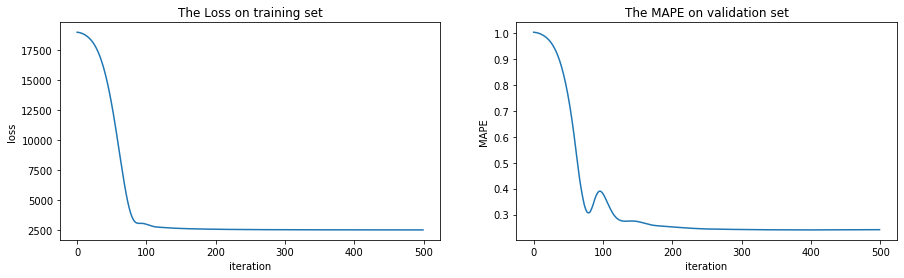

In [9]:
# Initialize Neural Network
fnn = model.FNN(D_in=121, H1=5, H2=3, D_out=1, iteration=500, lr=1e-2, device=device)
# Train network
fnn.train(dataset_train, val_proportion=0.2)

# Print lowest MAPE
print("lowest MAPE = %s" % fnn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
fnn.visualize()

In [ ]:
fnn.predict(dataset_test)

number of training data = 20120
number of validation data = 2221
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.21591081221898398


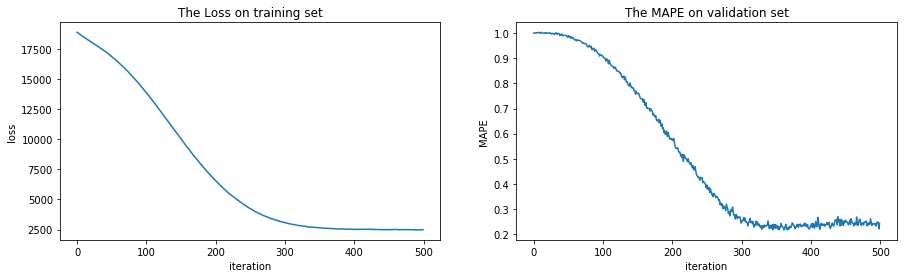

In [6]:
# Initialize Neural Network
nn = model.NN(D_in=121, H=64, D_out=1, iteration=500, lr=8e-4, device=device)
# Train network
nn.train(dataset_train, val_proportion=0.1)

# Print lowest MAPE
print("lowest MAPE = %s" % nn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
nn.visualize()

In [ ]:
nn.predict(dataset_test)